In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
pd.set_option('display.max_columns', None)
import os
import chart_studio.plotly as py
# import plotly.graph_ogjs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
#Importing the data
final_df=pd.DataFrame()
a_df=pd.DataFrame()
b_df=pd.DataFrame()
c_df=pd.DataFrame()

for file_n in os.listdir('listings'):
    if file_n[0]=='.':
        continue
    else:
        add_df = pd.read_csv(f'listings/{file_n}')
        if len(add_df.columns)==106:
            final_df = pd.concat([final_df, add_df], axis=0)
        elif len(add_df.columns)==96:
            a_df = pd.concat([a_df, add_df], axis=0)
        elif len(add_df.columns)==95:
            b_df = pd.concat([b_df, add_df], axis=0)
        else:
            c_df = pd.concat([c_df, add_df], axis=0)

/Users/sherryduong/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.

/Users/sherryduong/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.

/Users/sherryduong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [3]:
#These are the columns not present in 2018 reports. They will be dropped.
not_in_2018 = ['minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
       'minimum_nights_avg_ntm','maximum_nights_avg_ntm', 'number_of_reviews_ltm', 
       'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms', 
       'calculated_host_listings_count_shared_rooms']
sf_df = final_df.drop(columns=not_in_2018)
sf_df = pd.concat([sf_df, a_df], axis=0)

#drop one column not in 2017
sf_df = sf_df.drop(columns=['is_business_travel_ready'])
sf_df = pd.concat([sf_df, b_df], axis=0)

#drop 3 columns not in 2016 & Prior
sf_df = sf_df.drop(columns=['access', 'interaction', 'house_rules'])
sf_df = pd.concat([sf_df, c_df], axis=0)

/Users/sherryduong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




### Should we also add 2016? Columns are less & we would love the text columns "Access, Interaction, house_rules"

In [4]:
# old_95_df = pd.DataFrame()
# old_92_df = pd.DataFrame()

# for file_n in os.listdir('listings/Prior_to_2016'):
#     if file_n[0]=='.':
#         continue
#     else:
#         add_df = pd.read_csv(f'listings/Prior_to_2016/{file_n}')
#         if len(add_df.columns)==92:
#             old_92_df = pd.concat([old_92_df, add_df], axis=0)
#         else:
#             old_95_df = pd.concat([old_95_df, add_df], axis=0)
# #         print(file_n, len(add_df.columns))
# # #         old_df = pd.concat([old_df, add_df], axis=0)

In [5]:
# #columns present in new but not old
# print(sf_df.columns[~sf_df.columns.isin(old_92_df.columns)])

# # pd.DataFrame([np.sort(old_df.columns), np.sort(sf_df.columns)],index=['old','new'])

## Initial Look at the Data

In [6]:
sf_df.head()

,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee,country,country_code,description,experiences_offered,extra_people,first_review,guests_included,has_availability,host_about,host_acceptance_rate,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_picture_url,host_response_rate,host_response_time,host_since,host_thumbnail_url,host_total_listings_count,host_url,host_verifications,id,instant_bookable,is_location_exact,jurisdiction_names,last_review,last_scraped,latitude,license,listing_url,longitude,market,maximum_nights,medium_url,minimum_nights,monthly_price,name,neighborhood_overview,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,notes,number_of_reviews,picture_url,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit,smart_location,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode
0,3,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",11.0,68.0,19.0,21.0,1.0,Real Bed,1.0,2.0,1,2020-03-14,yesterday,moderate,San Francisco,$100.00,United States,US,New update: the house next door is under const...,none,$25.00,2009-07-23,2,t,We are a family with 2 boys born in 2009 and 2...,99%,t,1169,t,t,1.0,"San Francisco, California, United States",Holly,Duboce Triangle,https://a0.muscache.com/im/pictures/user/efdad...,100%,within an hour,2008-07-31,https://a0.muscache.com/im/pictures/user/efdad...,1.0,https://www.airbnb.com/users/show/1169,"['email', 'phone', 'facebook', 'reviews', 'kba']",958,t,t,"{""SAN FRANCISCO""}",2020-02-28,2020-03-14,37.76931,STR-0001256,https://www.airbnb.com/rooms/958,-122.43386,San Francisco,30,NaN,1,"$4,200.00","Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Lower Haight,Western Addition,NaN,Due to the fact that we have children and a do...,237,https://a0.muscache.com/im/pictures/b7c2a199-4...,$170.00,Apartment,f,f,t,10.0,10.0,10.0,10.0,10.0,97.0,9.0,1.83,Entire home/apt,20200313233841,$100.00,"San Francisco, CA","Newly remodeled, modern, and bright garden uni...",NaN,CA,"San Francisco, CA, United States",New update: the house next door is under const...,NaN,*Public Transportation is 1/2 block away. *Ce...,"$1,120.00",NaN,94117
1,5,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",0.0,0.0,0.0,0.0,1.0,Real Bed,2.0,3.0,1,2020-03-14,3 months ago,strict_14_with_grace_period,San Francisco,$100.00,United States,US,We live in a large Victorian house on a quiet ...,none,$0.00,2009-05-03,2,t,Philip: English transplant to the Bay Area and...,83%,t,8904,t,f,2.0,"San Francisco, California, United States",Philip And Tania,Bernal Heights,https://a0.muscache.com/im/users/8904/profile_...,100%,within a day,2009-03-02,https://a0.muscache.com/im/users/8904/profile_...,2.0,https://www.airbnb.com/users/show/8904,"['email', 'phone', 'reviews', 'kba', 'work_ema...",5858,f,t,"{""SAN FRANCISCO""}",2017-08-06,2020-03-14,37.74511,NaN,https://www.airbnb.com/rooms/5858,-122.42102,San Francisco,60,NaN,30,"$5,500.00",Creative Sanctuary,I love how our neighborhood feels quiet but is...,Bernal Heights,Bernal Heights,NaN,All the furniture in the house was handmade so...,111,https://a0.muscache.com/im/pictures/17714/3a7a...,$235.00,Apartment,f,f,t,10.0,10.0,10.0,10.0,10.0,98.0,9.0,0.84,Entire home/apt,20200313233841,NaN,"San Francisco, CA",We live in a large Victorian house on a quiet ...,NaN,CA,"San Francisco, CA, United States",NaN,NaN,The train is two blocks away and you can stop ...,"$1,600.00",NaN,94110
2,2,"{TV,In

In [7]:
sf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395202 entries, 0 to 7028
Data columns (total 92 columns):
accommodates                        395202 non-null int64
amenities                           389777 non-null object
availability_30                     395200 non-null float64
availability_365                    395200 non-null float64
availability_60                     395200 non-null float64
availability_90                     395200 non-null float64
bathrooms                           393685 non-null float64
bed_type                            395202 non-null object
bedrooms                            394978 non-null float64
beds                                394632 non-null float64
calculated_host_listings_count      395202 non-null int64
calendar_last_scraped               395202 non-null object
calendar_updated                    395202 non-null object
cancellation_policy                 389775 non-null object
city                                395016 non-null object
c

In [8]:
pd.set_option('display.max_rows', None)
sf_df.dtypes

accommodates                          int64
amenities                            object
availability_30                     float64
availability_365                    float64
availability_60                     float64
availability_90                     float64
bathrooms                           float64
bed_type                             object
bedrooms                            float64
beds                                float64
calculated_host_listings_count        int64
calendar_last_scraped                object
calendar_updated                     object
cancellation_policy                  object
city                                 object
cleaning_fee                         object
country                              object
country_code                         object
description                          object
experiences_offered                  object
extra_people                         object
first_review                         object
guests_included                 

In [9]:
#Null Cells
pd.set_option('display.max_rows', None)
print(f'Total rows: {len(sf_df)}')
(sf_df.isnull().sum()/len(sf_df)).sort_values(ascending=False)

Total rows: 395202


neighbourhood_group_cleansed        1.000000
square_feet                         0.978996
monthly_price                       0.807213
host_acceptance_rate                0.777256
weekly_price                        0.766869
license                             0.617854
thumbnail_url                       0.563127
medium_url                          0.563127
xl_picture_url                      0.563127
notes                               0.467040
has_availability                    0.389123
security_deposit                    0.376147
neighborhood_overview               0.342496
transit                             0.339009
host_about                          0.269356
review_scores_value                 0.213002
review_scores_checkin               0.212906
review_scores_location              0.212871
review_scores_accuracy              0.212355
review_scores_cleanliness           0.212142
review_scores_communication         0.212079
review_scores_rating                0.211160
space     

In [10]:
sf_df.describe()

,accommodates,availability_30,availability_365,availability_60,availability_90,bathrooms,bedrooms,beds,calculated_host_listings_count,guests_included,host_id,host_listings_count,host_total_listings_count,id,latitude,longitude,maximum_nights,minimum_nights,neighbourhood_group_cleansed,number_of_reviews,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,scrape_id,square_feet
count,395202.000000,395200.000000,395200.000000,395200.000000,395200.000000,393685.000000,394978.000000,394632.000000,395202.000000,395202.000000,3.952020e+05,389472.000000,389472.000000,3.952020e+05,395202.000000,395202.000000,3.952020e+05,3.952020e+05,0.0,395202.000000,311279.000000,311061.000000,311363.000000,311388.000000,311075.000000,311751.000000,311023.000000,314961.000000,3.952020e+05,8301.000000
mean,3.200313,8.870979,148.007756,21.147032,35.403446,1.319522,1.350141,1.752169,9.874507,1.655930,3.486865e+07,35.828083,35.828083,1.231826e+07,37.766612,-122.430566,2.359974e+05,7.094274e+03,NaN,33.596376,9.695890,9.815293,9.536801,9.808143,9.588713,94.929572,9.376776,1.826497,2.017568e+13,973.150102
std,2.007036,10.569430,137.026660,21.602063,32.995292,0.767639,0.942411,1.240402,34.567372,1.311165,5.380718e+07,199.630548,199.630548,9.989307e+06,0.022366,0.026153,2.215310e+07,8.416947e+05,NaN,60.777071,0.716683,0.580754,0.857040,0.599284,0.749737,7.224046,0.818956,2.041877,1.412479e+10,729.385627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000,0.000000,9.580000e+02,37.704145,-122.513147,1.000000e+00,1.000000e+00,NaN,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,20.000000,2.000000,0.000000,2.015050e+13,0.000000
25%,2.000000,0.000000,9.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.295580e+06,1.000000,1.000000,4.251491e+06,37.752180,-122.442660,2.800000e+01,1.000000e+00,NaN,1.000000,10.000000,10.000000,9.000000,10.000000,9.000000,93.000000,9.000000,0.370000,2.016110e+13,450.000000
50%,2.000000,4.000000,101.000000,14.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.173749e+07,1.000000,1.000000,1.021346e+07,37.768487,-122.425460,3.650000e+02,2.000000e+00,NaN,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,97.000000,10.000000,1.080000,2.017100e+13,850.000000
75%,4.000000,16.000000,294.000000,39.000000,65.000000,1.500000,2.000000,2.000000,3.000000,2.000000,4.318947e+07,4.000000,4.000000,1.804220e+07,37.784990,-122.411899,1.125000e+03,6.000000e+00,NaN,38.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,10.000000,2.720000,2.019040e+13,1390.000000
max,18.000000,30.000000,365.000000,60.000000,90.000000,15.000000,30.000000,30.000000,301.000000,30.000000,3.428298e+08,2347.000000,2347.000000,4.312629e+07,37.833405,-122.363243,2.147484e+09,1.000000e+08,NaN,821.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,10.000000,223.000000,2.020041e+13,5500.000000


# Data Cleaning & Exploration

In [11]:
pd.set_option('display.max_rows', 20)
#Converting Existing Data Columns to Dates
sf_df['last_scraped'] = pd.to_datetime(sf_df['last_scraped'])
sf_df['host_since'] = pd.to_datetime(sf_df['host_since'])
#Adding new date features
sf_df['year'] = sf_df['last_scraped'].transform(lambda x: x.year)
sf_df['month-year'] = sf_df['last_scraped'].transform(lambda x: f'{x.month} {x.year}')
sf_df['month'] = sf_df['last_scraped'].transform(lambda x: x.month)
sf_df['day_of_week'] = sf_df['last_scraped'].transform(lambda x: x.dt.dayofweek)
sf_df['day'] = sf_df['last_scraped'].transform(lambda x: x.day)

#Converting All Price Related Columns from Objects to Floats
sf_df['price'] = sf_df['price'].transform(lambda x: float(x.replace(',', '').replace('$', '')))
sf_df['extra_people'] = sf_df['extra_people'].transform(lambda x: float(x.replace(',', '').replace('$', '')))

#Fill NaNs in fee columns with 0's, because no additional fee, then convert
sf_df[['security_deposit','cleaning_fee']] = sf_df[['security_deposit','cleaning_fee']].fillna(int(0))
sf_df['security_deposit'] = sf_df['security_deposit'].transform(lambda x: 0 if x==int(0) else float(x.replace(',', '').replace('$', '')))
sf_df['cleaning_fee'] = sf_df['cleaning_fee'].transform(lambda x: 0 if x==int(0) else float(x.replace(',', '').replace('$', '')))

#Dropping columns that have over 75% null
over_70_null = sf_df.columns[sf_df.isnull().sum()/len(sf_df) > 0.70]
sf_df = sf_df.drop(columns=over_70_null)

In [89]:
sf_df['calendar_updated'].nunique()

104

In [88]:
#View of cleaned data for reference
sf_df.head()

,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee,country,country_code,description,experiences_offered,extra_people,first_review,guests_included,has_availability,host_about,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_picture_url,host_response_rate,host_response_time,host_since,host_thumbnail_url,host_total_listings_count,host_url,host_verifications,id,instant_bookable,is_location_exact,jurisdiction_names,last_review,last_scraped,latitude,license,listing_url,longitude,market,maximum_nights,medium_url,minimum_nights,name,neighborhood_overview,neighbourhood,neighbourhood_cleansed,notes,number_of_reviews,picture_url,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit,smart_location,space,state,street,summary,thumbnail_url,transit,xl_picture_url,zipcode,year,month-year,month,day_of_week,day
0,3,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",11.0,68.0,19.0,21.0,1.0,Real Bed,1.0,2.0,1,2020-03-14,yesterday,moderate,San Francisco,100.0,United States,US,New update: the house next door is under const...,none,25.0,2009-07-23,2,t,We are a family with 2 boys born in 2009 and 2...,t,1169,t,t,1.0,"San Francisco, California, United States",Holly,Duboce Triangle,https://a0.muscache.com/im/pictures/user/efdad...,100%,within an hour,2008-07-31,https://a0.muscache.com/im/pictures/user/efdad...,1.0,https://www.airbnb.com/users/show/1169,"['email', 'phone', 'facebook', 'reviews', 'kba']",958,t,t,"{""SAN FRANCISCO""}",2020-02-28,2020-03-14,37.76931,STR-0001256,https://www.airbnb.com/rooms/958,-122.43386,San Francisco,30,NaN,1,"Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Lower Haight,Western Addition,Due to the fact that we have children and a do...,237,https://a0.muscache.com/im/pictures/b7c2a199-4...,170.0,Apartment,f,f,t,10.0,10.0,10.0,10.0,10.0,97.0,9.0,1.83,Entire home/apt,20200313233841,100.0,"San Francisco, CA","Newly remodeled, modern, and bright garden uni...",CA,"San Francisco, CA, United States",New update: the house next door is under const...,NaN,*Public Transportation is 1/2 block away. *Ce...,NaN,94117,2020,3 2020,3,5,14
1,5,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",0.0,0.0,0.0,0.0,1.0,Real Bed,2.0,3.0,1,2020-03-14,3 months ago,strict_14_with_grace_period,San Francisco,100.0,United States,US,We live in a large Victorian house on a quiet ...,none,0.0,2009-05-03,2,t,Philip: English transplant to the Bay Area and...,t,8904,t,f,2.0,"San Francisco, California, United States",Philip And Tania,Bernal Heights,https://a0.muscache.com/im/users/8904/profile_...,100%,within a day,2009-03-02,https://a0.muscache.com/im/users/8904/profile_...,2.0,https://www.airbnb.com/users/show/8904,"['email', 'phone', 'reviews', 'kba', 'work_ema...",5858,f,t,"{""SAN FRANCISCO""}",2017-08-06,2020-03-14,37.74511,NaN,https://www.airbnb.com/rooms/5858,-122.42102,San Francisco,60,NaN,30,Creative Sanctuary,I love how our neighborhood feels quiet but is...,Bernal Heights,Bernal Heights,All the furniture in the house was handmade so...,111,https://a0.muscache.com/im/pictures/17714/3a7a...,235.0,Apartment,f,f,t,10.0,10.0,10.0,10.0,10.0,98.0,9.0,0.84,Entire home/apt,20200313233841,0.0,"San Francisco, CA",We live in a large Victorian house on a quiet ...,CA,"San Francisco, CA, United States",NaN,NaN,The train is two blocks away and you can stop ...,NaN,94110,2020,3 2020,3,5,14
2,2,"{TV,Internet,Wifi,Kitchen,""Free street parking...",30.0,365.0,60.0,90.0,4.0,Real Bed,1.0,1.0,9,2020-03-1

### Spike in Airbnb Rentals in 2017 were strongly linked to rent increases in some of the largest US metro areas

In [13]:
sf_df.describe()

,accommodates,availability_30,availability_365,availability_60,availability_90,bathrooms,bedrooms,beds,calculated_host_listings_count,cleaning_fee,extra_people,guests_included,host_id,host_listings_count,host_total_listings_count,id,latitude,longitude,maximum_nights,minimum_nights,number_of_reviews,price,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,scrape_id,security_deposit,year,month,day_of_week,day
count,395202.000000,395200.000000,395200.000000,395200.000000,395200.000000,393685.000000,394978.000000,394632.000000,395202.000000,395202.000000,395202.000000,395202.000000,3.952020e+05,389472.000000,389472.000000,3.952020e+05,395202.000000,395202.000000,3.952020e+05,3.952020e+05,395202.000000,395202.000000,311279.000000,311061.000000,311363.000000,311388.000000,311075.000000,311751.000000,311023.000000,314961.000000,3.952020e+05,395202.000000,395202.000000,395202.000000,395202.000000,395202.000000
mean,3.200313,8.870979,148.007756,21.147032,35.403446,1.319522,1.350141,1.752169,9.874507,73.410289,15.715265,1.655930,3.486865e+07,35.828083,35.828083,1.231826e+07,37.766612,-122.430566,2.359974e+05,7.094274e+03,33.596376,234.185409,9.695890,9.815293,9.536801,9.808143,9.588713,94.929572,9.376776,1.826497,2.017568e+13,281.082606,2017.500124,6.719141,3.031872,4.340595
std,2.007036,10.569430,137.026660,21.602063,32.995292,0.767639,0.942411,1.240402,34.567372,76.566412,28.673283,1.311165,5.380718e+07,199.630548,199.630548,9.989307e+06,0.022366,0.026153,2.215310e+07,8.416947e+05,60.777071,402.927951,0.716683,0.580754,0.857040,0.599284,0.749737,7.224046,0.818956,2.041877,1.412479e+10,566.513606,1.422051,3.517681,1.907715,3.737900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.800000e+01,0.000000,0.000000,9.580000e+02,37.704145,-122.513147,1.000000e+00,1.000000e+00,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,20.000000,2.000000,0.000000,2.015050e+13,0.000000,2015.000000,1.000000,0.000000,1.000000
25%,2.000000,0.000000,9.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000,3.295580e+06,1.000000,1.000000,4.251491e+06,37.752180,-122.442660,2.800000e+01,1.000000e+00,1.000000,100.000000,10.000000,10.000000,9.000000,10.000000,9.000000,93.000000,9.000000,0.370000,2.016110e+13,0.000000,2016.000000,4.000000,2.000000,2.000000
50%,2.000000,4.000000,101.000000,14.000000,29.000000,1.000000,1.000000,1.000000,1.000000,55.000000,0.000000,1.000000,1.173749e+07,1.000000,1.000000,1.021346e+07,37.768487,-122.425460,3.650000e+02,2.000000e+00,8.000000,157.000000,10.000000,10.000000,10.000000,10.000000,10.000000,97.000000,10.000000,1.080000,2.017100e+13,100.000000,2017.000000,7.000000,3.000000,2.000000
75%,4.000000,16.000000,294.000000,39.000000,65.000000,1.500000,2.000000,2.000000,3.000000,100.000000,25.000000,2.000000,4.318947e+07,4.000000,4.000000,1.804220e+07,37.784990,-122.411899,1.125000e+03,6.000000e+00,38.000000,250.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,10.000000,2.720000,2.019040e+13,400.000000,2019.000000,10.000000,5.000000,6.000000
max,18.000000,30.000000,365.000000,60.000000,90.000000,15.000000,30.000000,30.000000,301.000000,3000.000000,500.000000,30.000000,3.428298e+08,2347.000000,2347.000000,4.312629e+07,37.833405,-122.363243,2.147484e+09,1.000000e+08,821.000000,30000.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,10.000000,223.000000,2.020041e+13,5150.000000,2020.000000,12.000000,6.000000,17.000000


In [14]:
#NOTE TO SELF: 2018 IS MISSING JUNE DATA/LISTINGS, 2016 is missing Jan, Mar, 2015 only has 3 months
sf_df['year'].value_counts()
print((33908+85109)/len(sf_df))

0.30115485245520013


In [15]:
sf_df[sf_df==0].count().sort_values(ascending=False).head(20)

extra_people                 226406
security_deposit             195251
availability_30              152751
availability_60              121800
availability_90              105979
cleaning_fee                  88987
number_of_reviews             80057
availability_365              79407
day_of_week                   49341
bedrooms                      36542
host_total_listings_count      4469
host_listings_count            4469
beds                           2972
bathrooms                      2927
guests_included                2879
price                           205
reviews_per_month                26
accommodates                      1
host_response_time                0
host_response_rate                0
dtype: int64

## Train Test Split #1: Use 2015 - 2018 to predict 2019 & 2020

In [16]:
test_years=[2020,2019]
train_df = sf_df[~sf_df['year'].isin(test_years)]
test_df = sf_df[sf_df['year'].isin(test_years)]

In [17]:
pd.set_option('display.max_rows', 50)

## Data Visualizations

Text(0, 0.5, 'Average Daily Price of Listing')

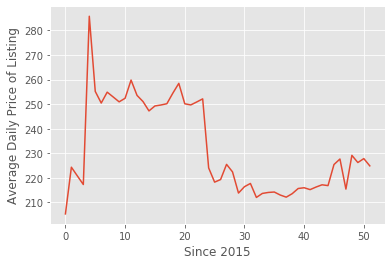

In [18]:
labels = sf_df.sort_values('last_scraped')['month-year'].unique()
data = sf_df.groupby(['year','month']).mean()['price']
fig, ax = plt.subplots()
ax.plot(data.values)
ax.set_xlabel('Since 2015')
ax.set_ylabel('Average Daily Price of Listing')
# ax.set_xticks(labels)

Text(0.5, 1.0, 'Average Daily Rates in SF per year 2015-2020')

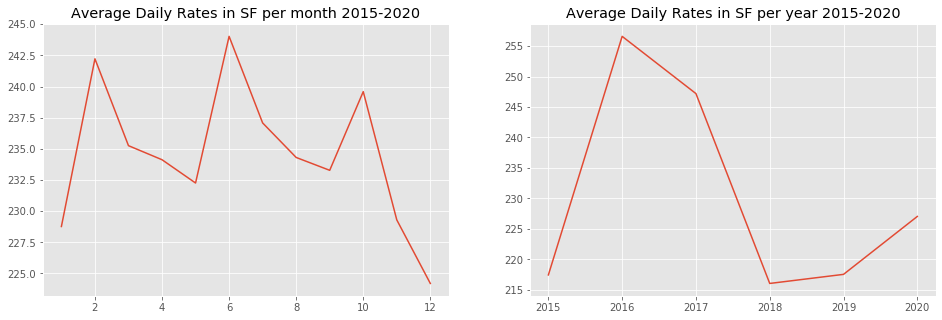

In [19]:
fig, ax = plt.subplots(1,2, figsize=(16,5))
ax[0].plot(sf_df.groupby('month').mean()['price'])
ax[0].set_title('Average Daily Rates in SF per month 2015-2020')
ax[1].plot(sf_df.groupby('year').mean()['price'])
ax[1].set_title('Average Daily Rates in SF per year 2015-2020')
# plt.savefig('Graphs/Daily_rate_over_time.png', dpi=300)

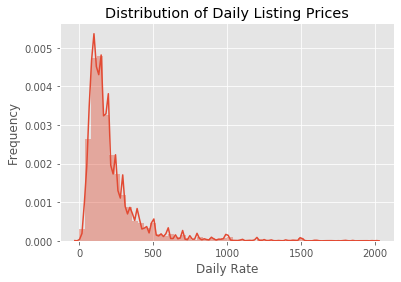

In [20]:
#Pretty right skewed, may need to convert to log
outlier_cutoff = 2000
sns.distplot(train_df[train_df['price']<outlier_cutoff]['price'])
plt.xlabel('Daily Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Listing Prices')
plt.savefig('Graphs/Distribution_Daily_Prices.png', dpi=300)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a28d13fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a28d246d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a28d13f90>],
 'medians': [<matplotlib.lines.Line2D at 0x1a28d24ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a28d2d650>],
 'means': []}

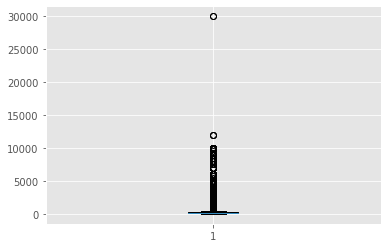

In [21]:
plt.boxplot(train_df['price'])

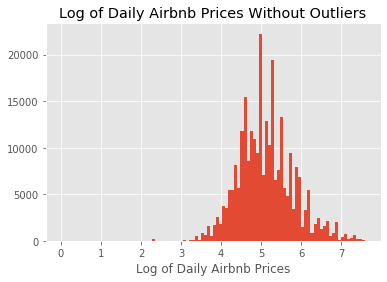

In [22]:
# #Why are we getting negative log?
crt1 = (train_df['price']<outlier_cutoff)
crt2 = (train_df['price']>0)
x = np.log((train_df[crt1 & crt2]['price']))
x.hist(bins=100)
plt.xlabel('Log of Daily Airbnb Prices')
plt.title('Log of Daily Airbnb Prices Without Outliers')
plt.savefig('Graphs/Log_DailyRates.png', dpi=300)
# train_df[train_df['price']==0] #Note to self, need to remove/deal with 0
#More normal distribution. Can decide how to deal with the 0's 

Outlier Cutoff: 25, Pct Outliers: 0.0016184803664210583


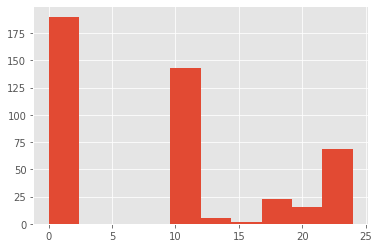

In [23]:
#Visualizing lower end of outliers
print(f"Outlier Cutoff: {25}, Pct Outliers: {train_df[train_df['price']<25]['price'].count()/len(train_df)}")
train_df[train_df['price']<25]['price'].hist()
#Note to self, need to remove or impude these outliers

Outlier Cutoff: 2000, Pct Outliers: 0.0


Text(0, 0.5, 'Frequency')

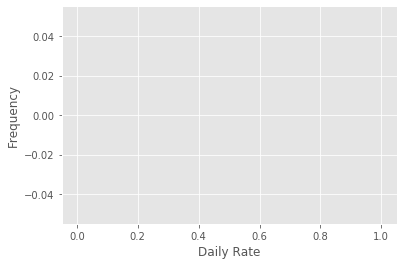

In [93]:
#Visualizing high end of outliers
outlier_cutoff=2000
print(f"Outlier Cutoff: {outlier_cutoff}, Pct Outliers: {train_df[train_df['price']>outlier_cutoff]['price'].count()/len(train_df)}")

train_df[train_df['price']>outlier_cutoff]['price'].hist(bins=50)
plt.xlabel('Daily Rate')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Average Daily Rates in SF per year 2015-2020')

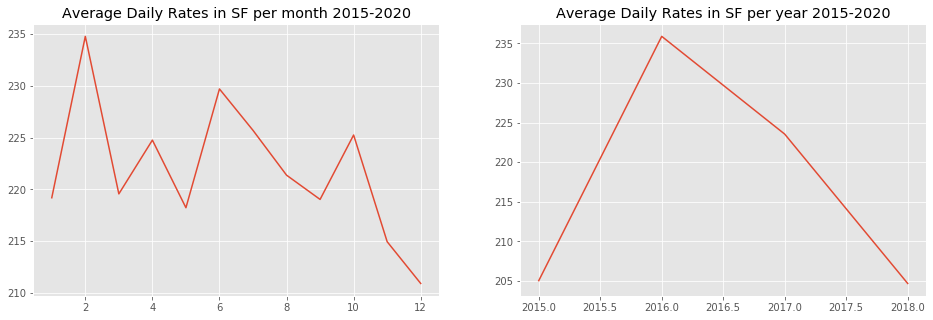

In [25]:
#Removing Outliers (0 & over 2000 daily rate)
outlier_thresh=2000
train_df = train_df.loc[~((train_df['price'] == 0) | (train_df['price'] > outlier_thresh))]
fig, ax = plt.subplots(1,2, figsize=(16,5))
ax[0].plot(train_df.groupby('month').mean()['price'])
ax[0].set_title('Average Daily Rates in SF per month 2015-2020')
ax[1].plot(train_df.groupby('year').mean()['price'])
ax[1].set_title('Average Daily Rates in SF per year 2015-2020')

In [26]:
numeric_data = train_df.select_dtypes(include=[np.number])
cat_data = train_df.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 36 numeric and 56 categorical columns in train data


## Cleaning/Dealing with the null values under 70%

In [27]:
train_df.isnull().sum().sort_values(ascending=False).head(50)/len(sf_df)

license                             0.502887
has_availability                    0.387237
notes                               0.348250
neighborhood_overview               0.262053
thumbnail_url                       0.260684
medium_url                          0.260684
xl_picture_url                      0.260684
transit                             0.246087
host_about                          0.194637
host_response_rate                  0.164086
host_response_time                  0.164083
space                               0.163524
review_scores_value                 0.146485
review_scores_checkin               0.146393
review_scores_location              0.146358
review_scores_accuracy              0.145882
review_scores_cleanliness           0.145688
review_scores_communication         0.145665
review_scores_rating                0.144890
first_review                        0.138534
reviews_per_month                   0.138534
last_review                         0.138193
host_neigh

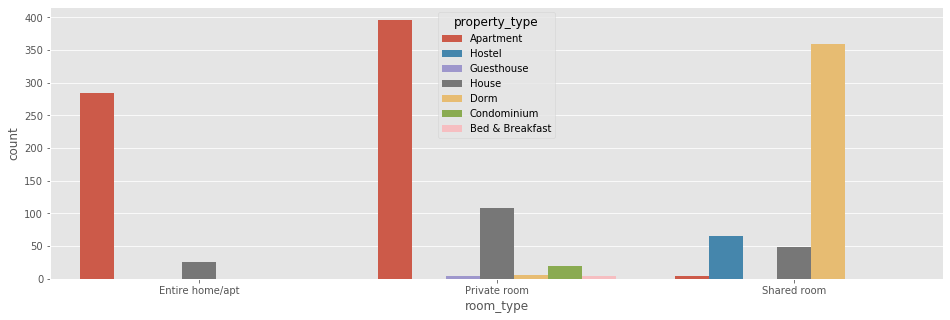

In [28]:
plt.figure(figsize=(16,5))
sns.countplot(data=train_df[train_df['bathrooms'].isnull()], x='room_type', hue='property_type')
#For entire home/apt, likely a one bedroom with 1 bathroom.
#For private/shared room, can fillna with 0

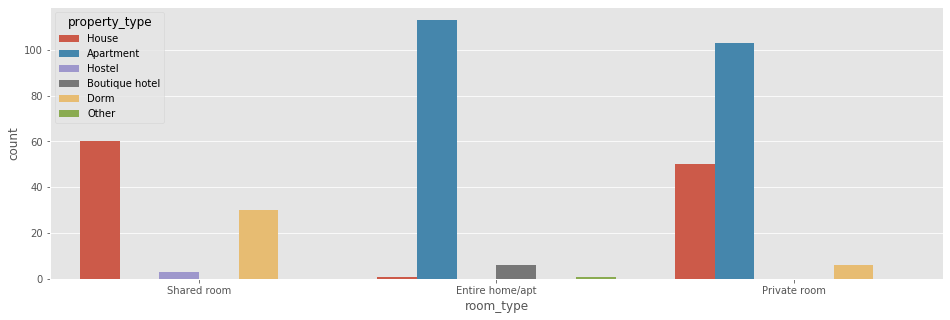

In [29]:
plt.figure(figsize=(16,5))
sns.countplot(data=train_df[train_df['beds'].isnull()], x='room_type', hue='property_type')

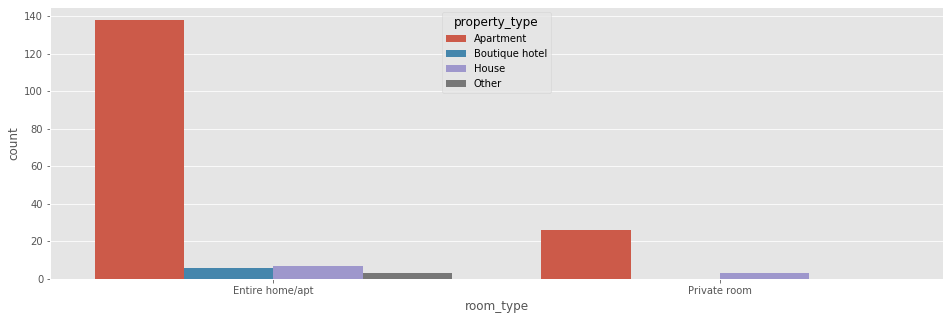

In [30]:
plt.figure(figsize=(16,5))
sns.countplot(data=train_df[train_df['bedrooms'].isnull()], x='room_type', hue='property_type')

In [31]:
#Filling the NaNs in beds, bathrooms, bedrooms
#Assume that if the tenant has the full apartment, they have a bathroom/bedroom
cond1= (train_df['room_type']=='Entire home/apt')
train_df.loc[cond1 & (train_df['beds']==0), train_df.columns=='beds'] = 1
train_df.loc[cond1 & (train_df['bathrooms']==0), train_df.columns=='bathrooms']
#For the rest, just fill na
train_df[['beds','bathrooms', 'bedrooms']] = train_df[['beds','bathrooms', 'bedrooms']].fillna(0)

In [32]:
#For review scores, let's just fillin with the average
review_lst = ['review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value']
for review in review_lst:
    train_df[review] = train_df[review].fillna(train_df[review].mean())

## Data Visualizations: Numeric Data

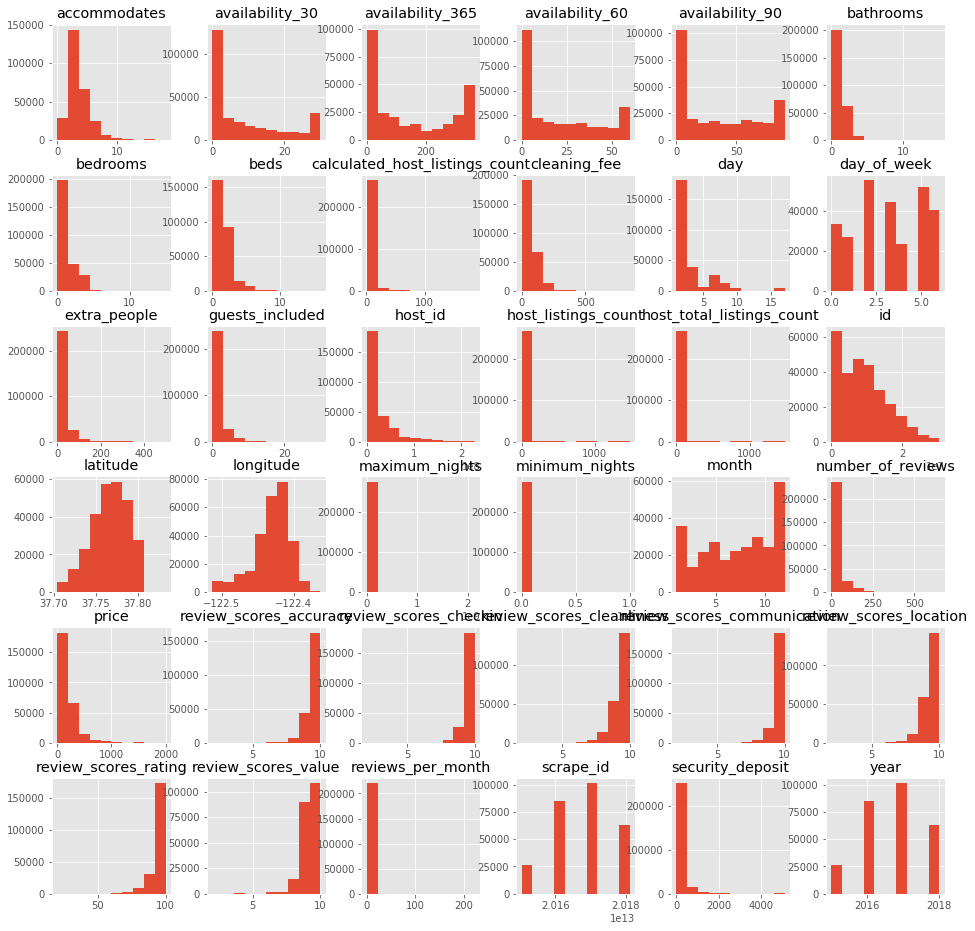

In [33]:
numeric_data.hist(figsize=(16,16))
plt.show()

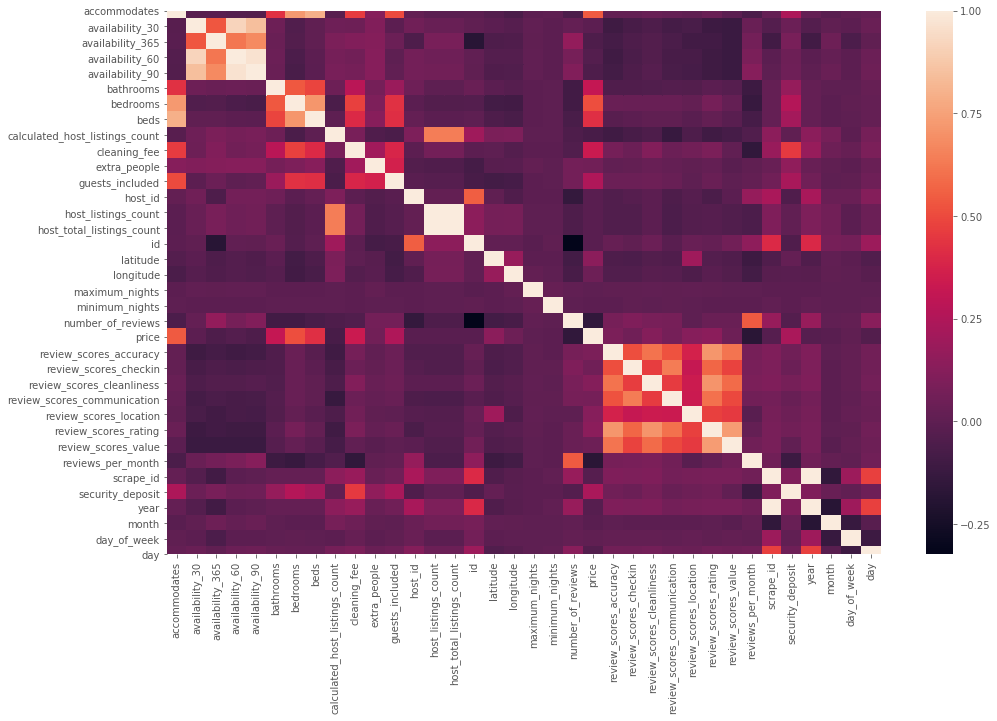

In [34]:
fig, ax = plt.subplots(figsize=(16,10))
corr = numeric_data.corr()
sns.heatmap(corr)
# plt.savefig('Graphs/numeric_corr.png', dpi=300)

In [35]:
corr['price'].sort_values(ascending=False)[:-1]

price                             1.000000
accommodates                      0.540751
bedrooms                          0.511149
beds                              0.421629
cleaning_fee                      0.336666
bathrooms                         0.317430
guests_included                   0.245840
security_deposit                  0.234032
latitude                          0.138305
review_scores_rating              0.137467
review_scores_location            0.122184
review_scores_cleanliness         0.117299
review_scores_accuracy            0.092902
review_scores_communication       0.070035
extra_people                      0.060073
review_scores_checkin             0.056321
longitude                         0.046266
review_scores_value               0.045866
day_of_week                       0.006303
maximum_nights                   -0.001979
availability_30                  -0.004878
minimum_nights                   -0.005031
id                               -0.017315
host_total_

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

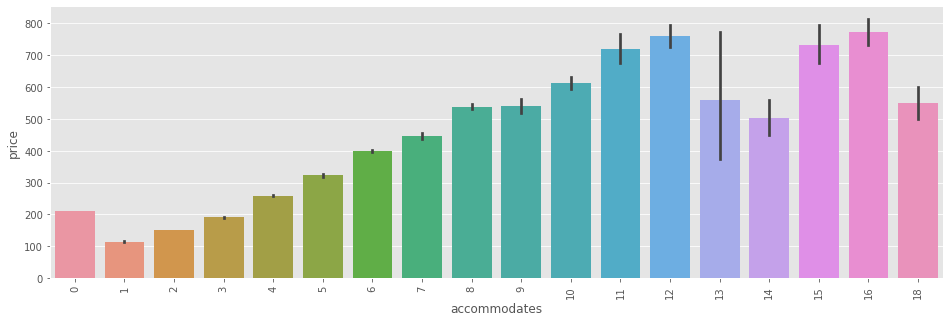

In [36]:
feature = 'accommodates'
fig, ax = plt.subplots(figsize=(16,5))
# print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )
plt.xticks(rotation=90)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

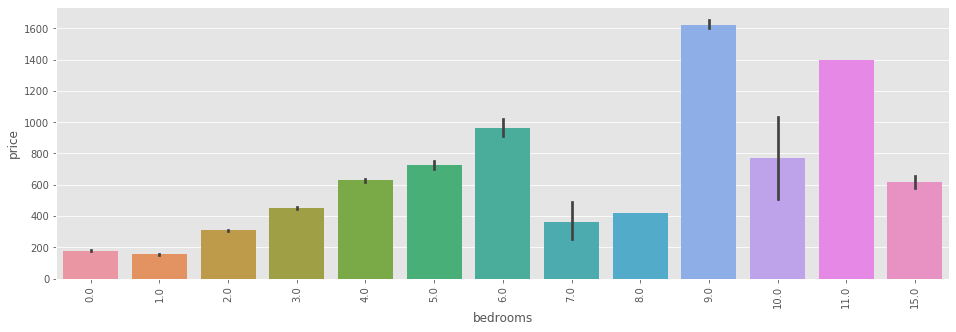

In [37]:
feature = 'bedrooms'
fig, ax = plt.subplots(figsize=(16,5))
# print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price')
plt.xticks(rotation=90)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

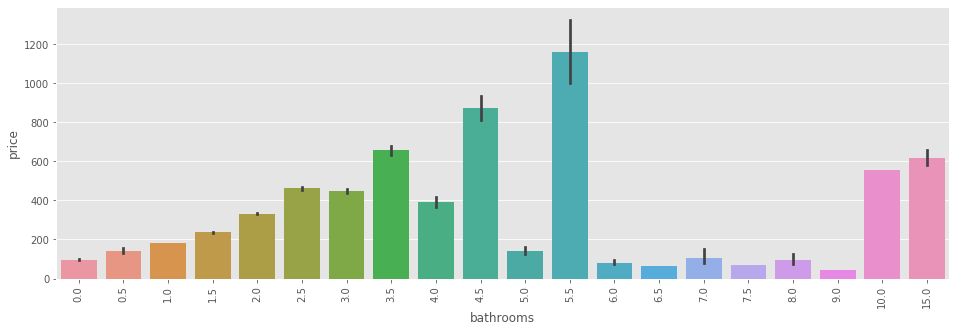

In [38]:
feature = 'bathrooms'
fig, ax = plt.subplots(figsize=(16,5))
# print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )
plt.xticks(rotation=90)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

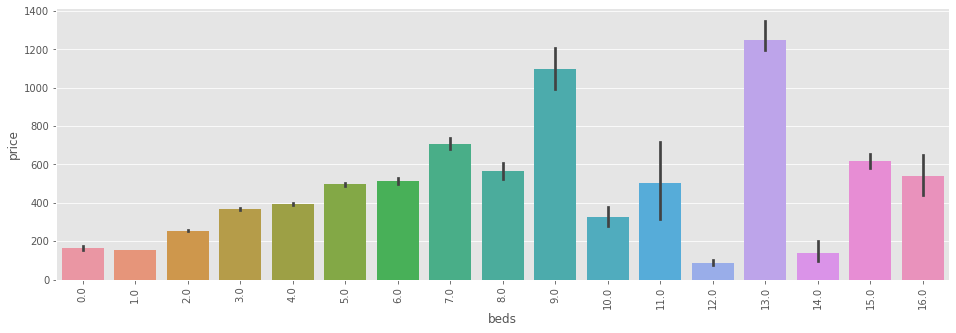

In [39]:
feature = 'beds'
fig, ax = plt.subplots(figsize=(16,5))
# print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )
plt.xticks(rotation=90)
plt.tight_layout

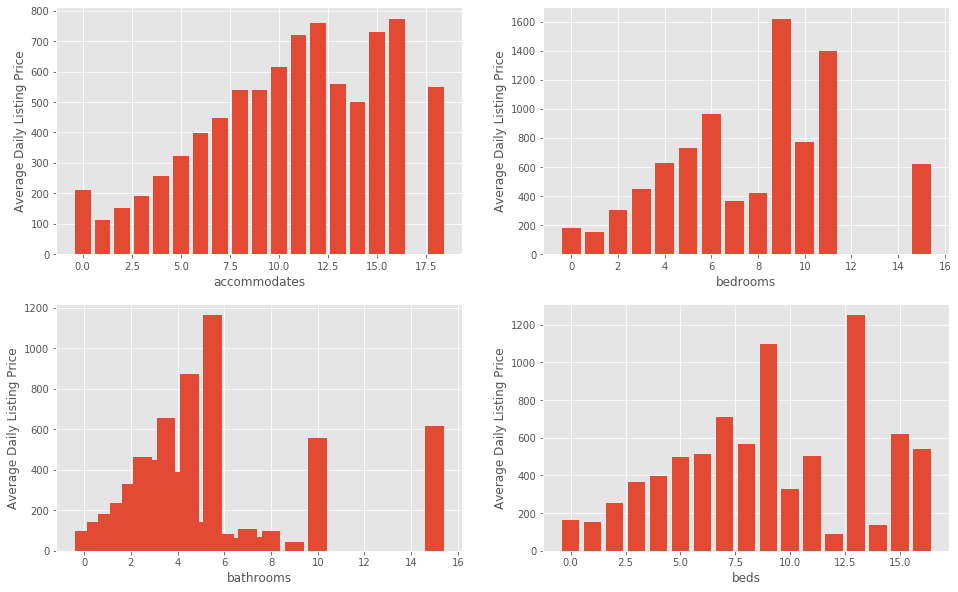

In [40]:
lst = ['accommodates', 'bedrooms', 'bathrooms', 'beds']
fig, axes = plt.subplots(2,2,figsize=(16,10))
for i, ax in enumerate(axes.flatten()):
    df = train_df.groupby([lst[i]]).mean()['price']
    ax.bar(x=df.index, height=df)
    ax.set_xlabel(f'{lst[i]}')
    ax.set_ylabel('Average Daily Listing Price')
plt.savefig('Graphs/price_vs_accom.png', dpi=300)

### Why do some places with a lot of bedrooms & bathroom suddenly drop in price?

Real Bed         267566
Futon              2506
Pull-out Sofa      2173
Airbed             1739
Couch               887
Name: bed_type, dtype: int64


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

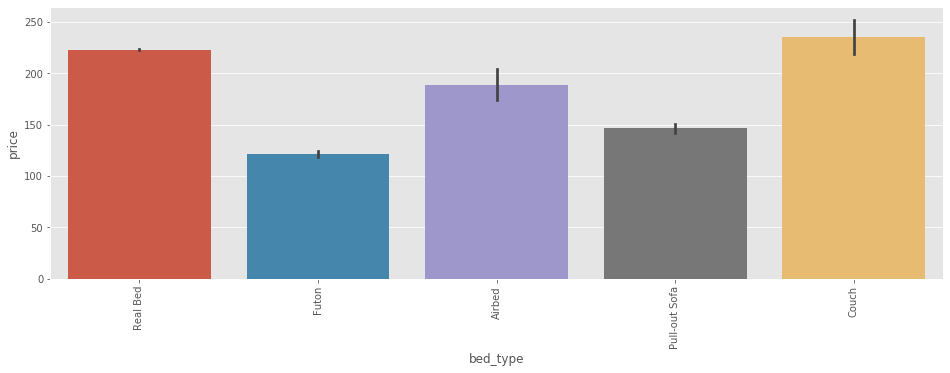

In [41]:
feature = 'bed_type'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price')
plt.xticks(rotation=90)
plt.tight_layout
#Why are places with Airbeds more popular?

0.0       140103
500.0      31796
200.0      17600
100.0      16316
300.0      13417
           ...  
186.0          1
749.0          1
2999.0         1
188.0          1
875.0          1
Name: security_deposit, Length: 257, dtype: int64


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

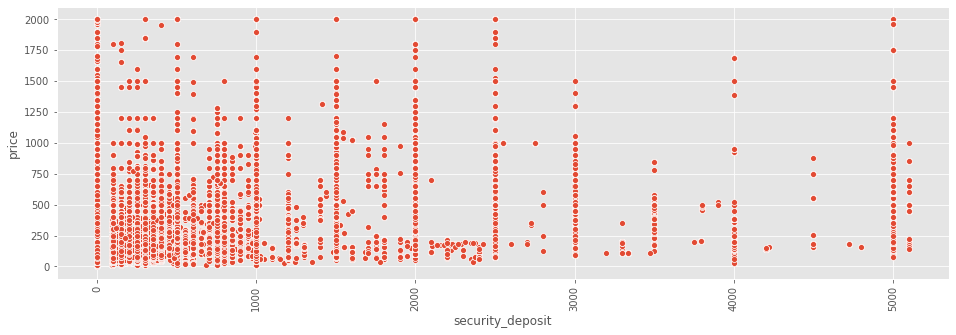

In [42]:
feature = 'security_deposit'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.scatterplot(data=train_df, x=feature, y='price')
plt.xticks(rotation=90)
plt.tight_layout
#May be useful to convert to "Has Security Deposit?" feature

0.0      69473
50.0     22587
100.0    22554
150.0    13193
75.0     12601
         ...  
102.0        1
675.0        1
178.0        1
459.0        1
107.0        1
Name: cleaning_fee, Length: 260, dtype: int64


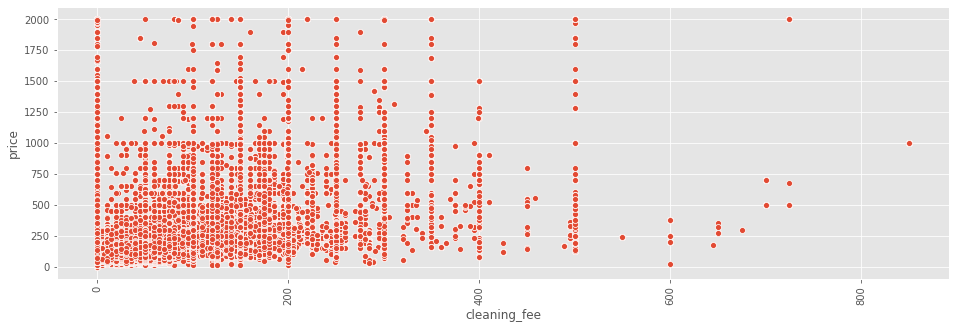

In [43]:
feature = 'cleaning_fee'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.scatterplot(data=train_df, x=feature, y='price')
plt.xticks(rotation=90)
plt.tight_layout
plt.savefig('Graphs/cleaning_fee.png', dpi=300)
#May be useful to convert to "Has Security Deposit?" feature

0.0      159516
25.0      24165
50.0      17989
20.0      15914
10.0       9129
          ...  
245.0         1
119.0         1
145.0         1
73.0          1
71.0          1
Name: extra_people, Length: 117, dtype: int64


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

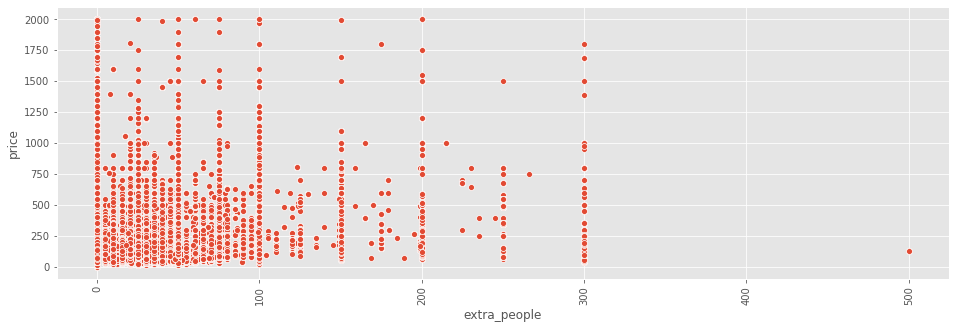

In [44]:
feature = 'extra_people'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.scatterplot(data=train_df, x=feature, y='price')
plt.xticks(rotation=90)
plt.tight_layout
#May be useful to convert to "Has Security Deposit?" feature

100.000000    59375
94.678595     57261
98.000000     20276
97.000000     18082
96.000000     17283
              ...  
43.000000         2
59.000000         1
28.000000         1
52.000000         1
47.000000         1
Name: review_scores_rating, Length: 61, dtype: int64


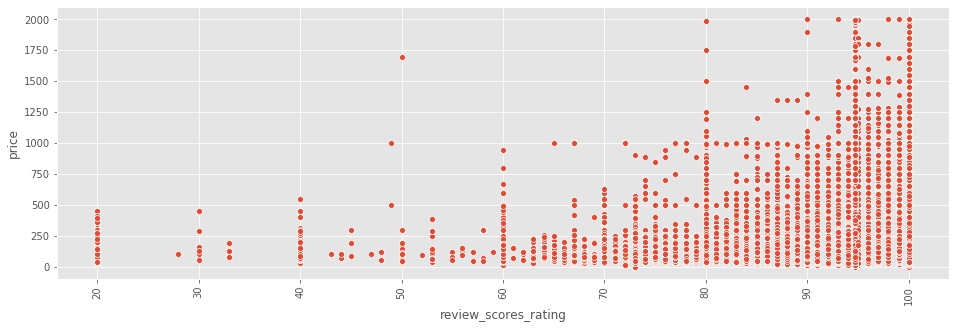

In [45]:
feature = 'review_scores_rating'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.scatterplot(data=train_df, x=feature, y='price')
plt.xticks(rotation=90)
plt.tight_layout
plt.savefig('Graphs/reviews_scatter.png', dpi=300)
#Clear indication that higher reviews will have higher listing prices

10.000000    142090
9.503238      57576
9.000000      54631
8.000000      14194
7.000000       3387
6.000000       1863
4.000000        506
2.000000        348
5.000000        220
3.000000         56
Name: review_scores_cleanliness, dtype: int64


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

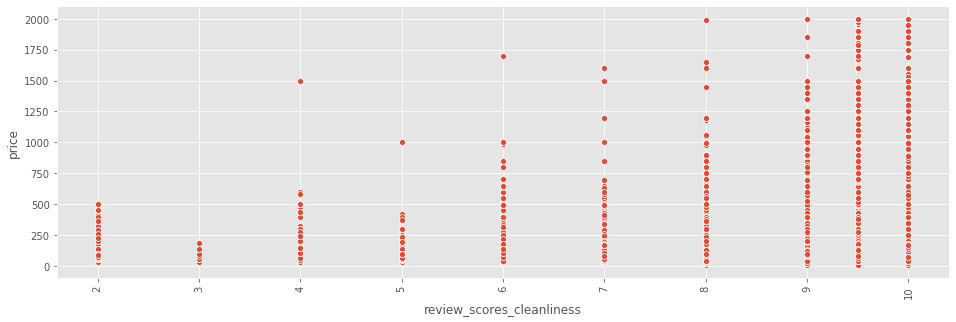

In [46]:
feature = 'review_scores_cleanliness'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.scatterplot(data=train_df, x=feature, y='price')
plt.xticks(rotation=90)
plt.tight_layout

10.000000    142352
9.000000      59158
9.550988      57841
8.000000      11373
7.000000       2242
6.000000       1410
4.000000        182
2.000000        134
5.000000        119
3.000000         60
Name: review_scores_location, dtype: int64


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

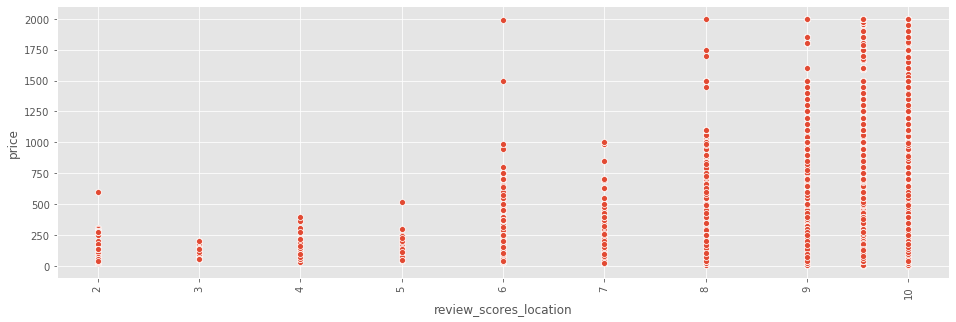

In [47]:
feature = 'review_scores_location'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.scatterplot(data=train_df, x=feature, y='price')
plt.xticks(rotation=90)
plt.tight_layout

10.000000    108284
9.000000      89656
9.370324      57891
8.000000      14627
7.000000       2085
6.000000       1416
4.000000        383
2.000000        283
5.000000        243
3.000000          3
Name: review_scores_value, dtype: int64


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

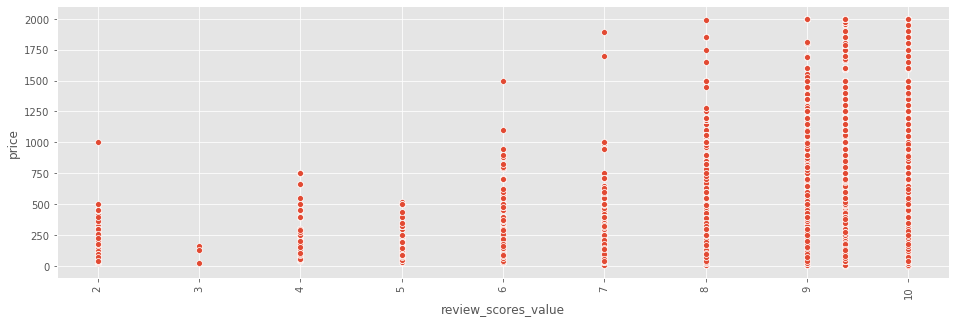

In [48]:
feature = 'review_scores_value'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.scatterplot(data=train_df, x=feature, y='price')
plt.xticks(rotation=90)
plt.tight_layout

## Categorical Data Visualizations

In [49]:
#No experiences offered, cannot use
train_df['experiences_offered'].value_counts()

none    269455
Name: experiences_offered, dtype: int64

In [50]:
#Host Since Date?
# train_df['host_since'].

### Seems that host that take longer to reply have higher daily price, however with more error. This is likely due to the fact that longer response time hosts are the minority

within an hour        114160
within a few hours     57722
within a day           34362
a few days or more      3781
Name: host_response_time, dtype: int64


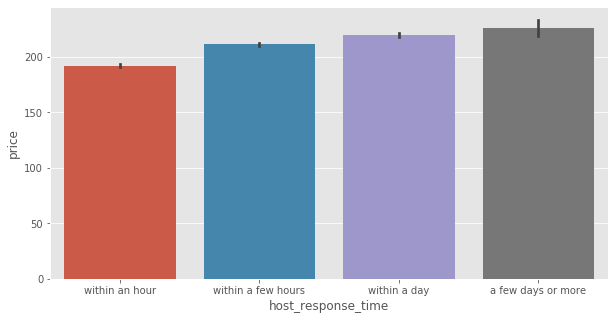

In [51]:
#Host_response_time
feature = 'host_response_time'
fig, ax = plt.subplots(figsize=(10,5))
print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )

100%    158496
90%       8401
80%       4168
99%       2572
50%       2299
         ...  
19%          1
32%          1
5%           1
4%           1
6%           1
Name: host_response_rate, Length: 97, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]),
 <a list of 97 Text xticklabel objects>)

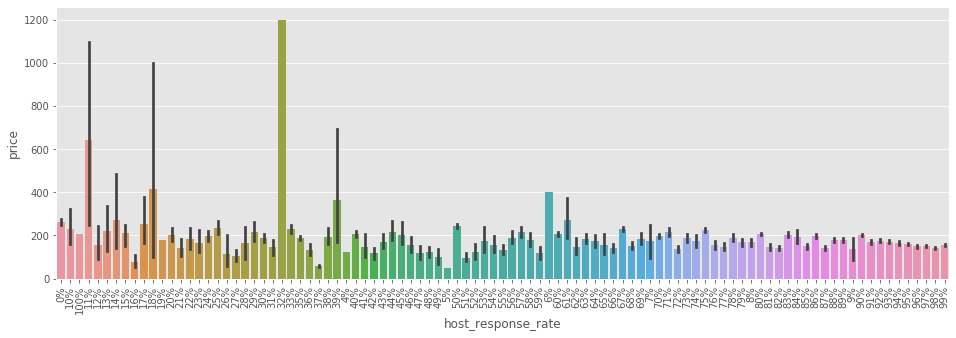

In [52]:
feature = 'host_response_rate'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.barplot(data=train_df.sort_values(feature), x=feature, y='price' )
plt.xticks(rotation=90)
#Note to self: Transform this into bins
#Random distribution. The highest listing prices have low response rates. Likely too many interested parties?

f    214999
t     59652
Name: host_is_superhost, dtype: int64


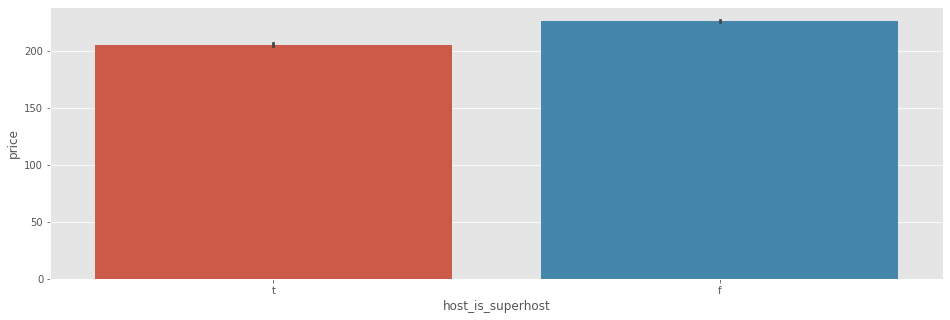

In [53]:
feature = 'host_is_superhost'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )
#No indication that a superhost is significant

In [54]:
train_df['host_total_listings_count'].value_counts()

1.0       156714
2.0        45035
3.0        17794
4.0        11304
5.0         5710
           ...  
749.0          1
894.0          1
159.0          1
158.0          1
1299.0         1
Name: host_total_listings_count, Length: 320, dtype: int64

## Neighborhoods have clear impact on the listing price

Mission                  32712
Western Addition         23989
South of Market          19901
Castro/Upper Market      16100
Downtown/Civic Center    15349
Bernal Heights           14686
Haight Ashbury           13280
Noe Valley               12105
Nob Hill                  9639
Marina                    9363
Inner Richmond            9034
Potrero Hill              8785
Outer Sunset              8649
Pacific Heights           7231
Russian Hill              7182
Outer Richmond            6039
Outer Mission             5793
North Beach               5745
Inner Sunset              5310
Excelsior                 4802
Financial District        4518
Parkside                  4453
Bayview                   4379
West of Twin Peaks        4232
Chinatown                 4026
Ocean View                3844
Twin Peaks                2846
Glen Park                 2638
Lakeshore                 1853
Visitacion Valley         1685
Presidio Heights          1280
Crocker Amazon            1169
Seacliff

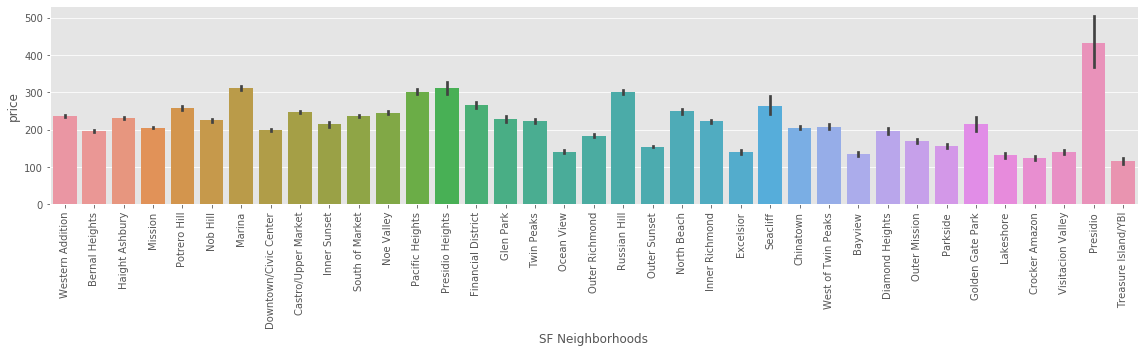

In [55]:
feature = 'neighbourhood_cleansed'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )
plt.xticks(rotation=90)
plt.xlabel('SF Neighborhoods')
plt.tight_layout()
plt.savefig('Graphs/neighborhood_dist.png', dpi=300)

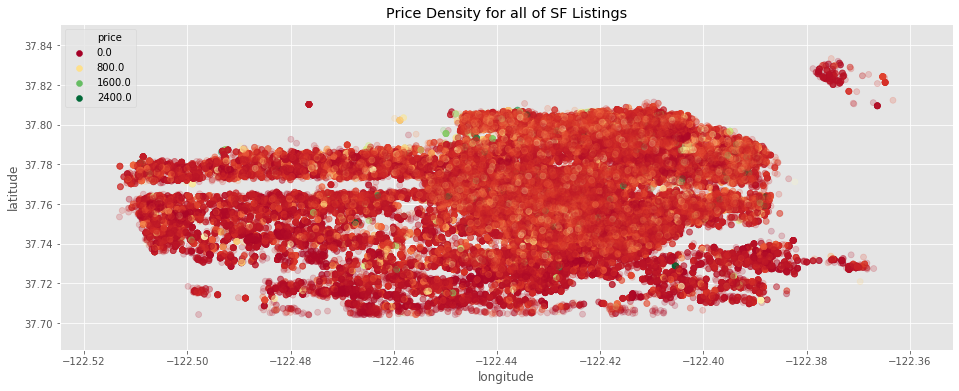

In [56]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='longitude',y='latitude', data=train_df, 
                edgecolor=None, alpha=0.2, palette='RdYlGn', hue='price')
plt.title('Price Density for all of SF Listings')
plt.savefig('Graphs/all_listings_sf.png', dpi=300)

Text(0.5, 1.0, 'Top 10.0% Of Listing Prices in San Francisco')

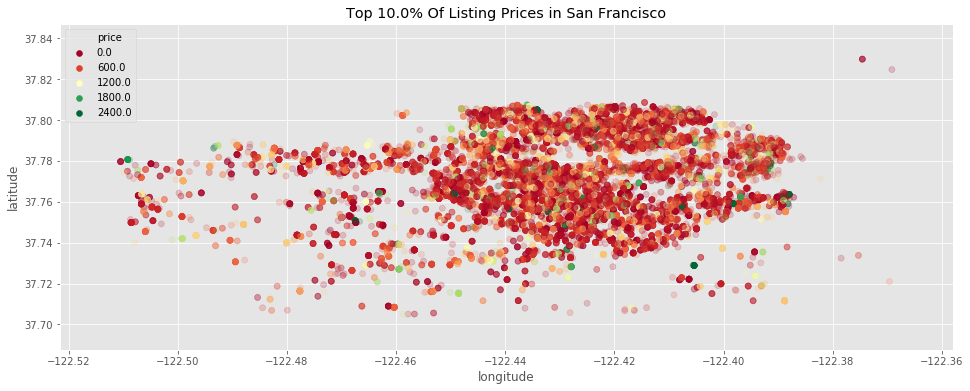

In [57]:
#Top 1% of daily listing prices are concentrated in the San Francisco city center
pct = 0.10
top = int(round(len(train_df)*pct,0))
ix = (train_df['price'].sort_values(ascending=False)[:top])
plot = train_df[train_df['price'].isin(ix)]
plt.figure(figsize=(16,6))
sns.scatterplot(x='longitude',y='latitude', data=plot, 
                edgecolor=None, alpha=0.2, palette='RdYlGn', hue='price')
plt.title(f'Top {pct*100}% Of Listing Prices in San Francisco')
# plt.savefig('Graphs/scatter_heatmap_neighborhoods.png', dpi=300)

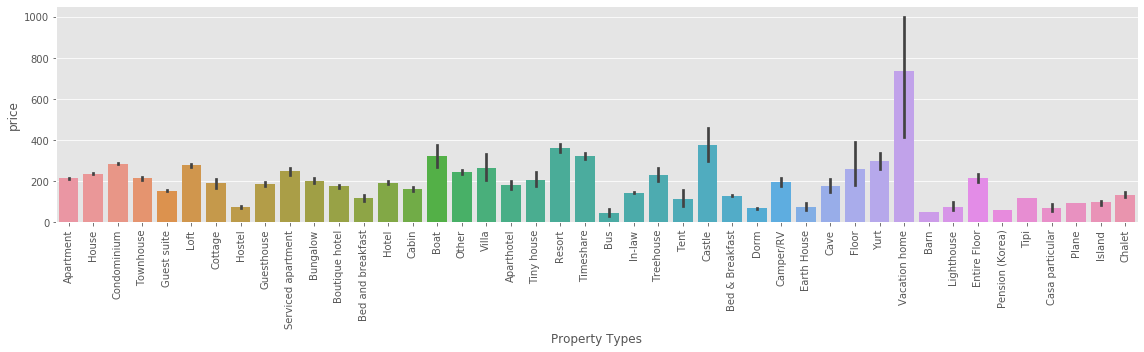

In [58]:
feature = 'property_type'
fig, ax = plt.subplots(figsize=(16,5))
# print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )
plt.xticks(rotation=90)
plt.xlabel('Property Types')
plt.tight_layout()
plt.savefig('Graphs/propertytype_dist.png', dpi=300)
#Pretty even distribution unless it is a vacation home. Either feature engineer for "vacation home?" 

Entire home/apt    161086
Private room       104959
Shared room          8826
Name: room_type, dtype: int64


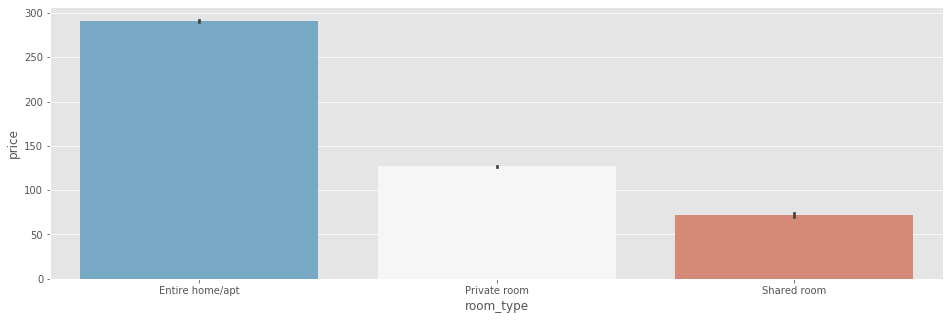

In [59]:
feature = 'room_type'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price', palette='RdBu_r')
plt.tight_layout
plt.savefig('Graphs/roomtype_dist.png', dpi=300)
#Clear distributions depending on type of room, will create dummies for this.

f    208480
t     60975
Name: instant_bookable, dtype: int64


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

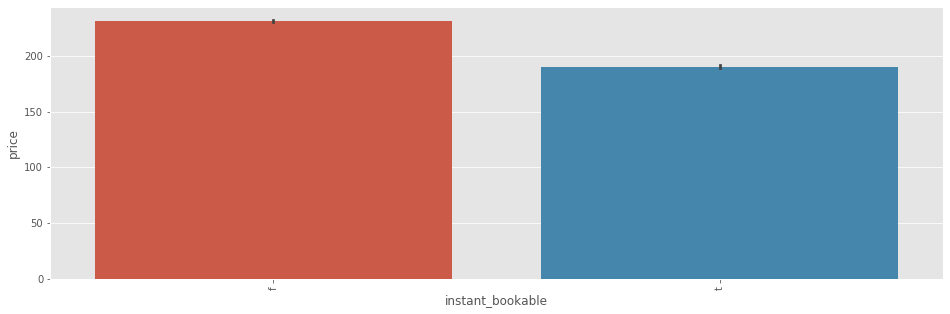

In [60]:
feature = 'instant_bookable'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )
plt.xticks(rotation=90)
plt.tight_layout

strict                         90230
moderate                       83843
flexible                       74996
strict_14_with_grace_period    19444
super_strict_30                  704
super_strict_60                  234
flexible_new                       3
no_refunds                         1
Name: cancellation_policy, dtype: int64


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

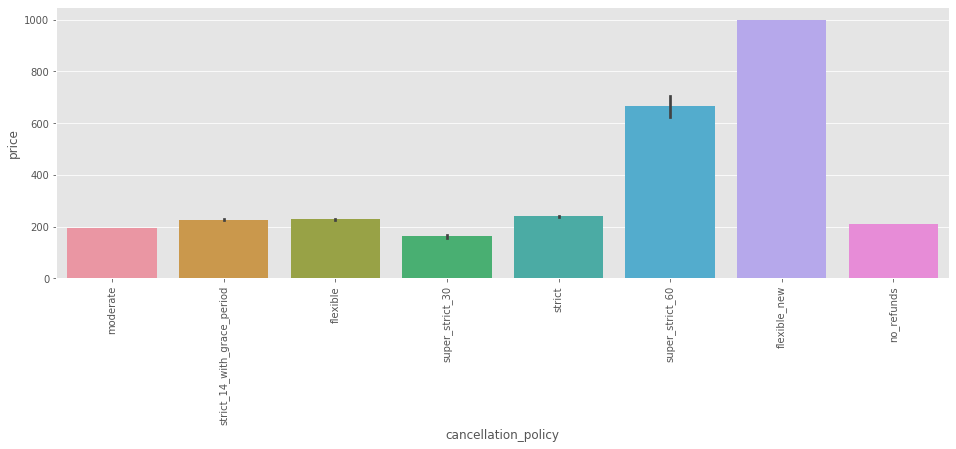

In [61]:
feature = 'cancellation_policy'
fig, ax = plt.subplots(figsize=(16,5))
print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )
plt.xticks(rotation=90)
plt.tight_layout

## Feature Engineering Ideas

In [62]:
train_df.head()

,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee,country,country_code,description,experiences_offered,extra_people,first_review,guests_included,has_availability,host_about,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_picture_url,host_response_rate,host_response_time,host_since,host_thumbnail_url,host_total_listings_count,host_url,host_verifications,id,instant_bookable,is_location_exact,jurisdiction_names,last_review,last_scraped,latitude,license,listing_url,longitude,market,maximum_nights,medium_url,minimum_nights,name,neighborhood_overview,neighbourhood,neighbourhood_cleansed,notes,number_of_reviews,picture_url,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit,smart_location,space,state,street,summary,thumbnail_url,transit,xl_picture_url,zipcode,year,month-year,month,day_of_week,day
0,3,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",1.0,140.0,6.0,17.0,1.0,Real Bed,1.0,2.0,1,2018-10-03,yesterday,moderate,San Francisco,100.0,United States,US,Our bright garden unit overlooks a grassy back...,none,25.0,2009-07-23,2,t,We are a family with 2 boys born in 2009 and 2...,t,1169,t,t,1.0,"San Francisco, California, United States",Holly,Duboce Triangle,https://a0.muscache.com/im/pictures/efdad96a-3...,100%,within an hour,2008-07-31,https://a0.muscache.com/im/pictures/efdad96a-3...,1.0,https://www.airbnb.com/users/show/1169,"['email', 'phone', 'facebook', 'reviews', 'kba']",958,f,t,"{""SAN FRANCISCO""}",2018-09-17,2018-10-03,37.769310,STR-0001256,https://www.airbnb.com/rooms/958,-122.433856,San Francisco,30,NaN,1,"Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Duboce Triangle,Western Addition,Due to the fact that we have children and a do...,160,https://a0.muscache.com/im/pictures/51332160/0...,170.0,Apartment,f,f,t,10.0,10.0,10.0,10.0,10.0,97.0,10.0,1.43,Entire home/apt,20181003014841,100.0,"San Francisco, CA","Newly remodeled, modern, and bright garden uni...",CA,"San Francisco, CA, United States",Our bright garden unit overlooks a grassy back...,NaN,*Public Transportation is 1/2 block away. *Ce...,NaN,94117,2018,10 2018,10,2,3
1,5,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",30.0,365.0,60.0,90.0,1.0,Real Bed,2.0,3.0,1,2018-10-03,6 weeks ago,strict_14_with_grace_period,San Francisco,100.0,United States,US,We live in a large Victorian house on a quiet ...,none,0.0,2009-05-03,2,t,Philip: English transplant to the Bay Area and...,t,8904,t,f,2.0,"San Francisco, California, United States",Philip And Tania,Bernal Heights,https://a0.muscache.com/im/users/8904/profile_...,NaN,NaN,2009-03-02,https://a0.muscache.com/im/users/8904/profile_...,2.0,https://www.airbnb.com/users/show/8904,"['email', 'phone', 'reviews', 'kba', 'work_ema...",5858,f,t,"{""SAN FRANCISCO""}",2017-08-06,2018-10-03,37.745112,NaN,https://www.airbnb.com/rooms/5858,-122.421018,San Francisco,60,NaN,30,Creative Sanctuary,I love how our neighborhood feels quiet but is...,Bernal Heights,Bernal Heights,All the furniture in the house was handmade so...,112,https://a0.muscache.com/im/pictures/17714/3a7a...,235.0,Apartment,f,f,t,10.0,10.0,10.0,10.0,10.0,98.0,9.0,0.98,Entire home/apt,20181003014841,0.0,"San Francisco, CA",We live in a large Victorian house on a quiet ...,CA,"San Francisco, CA, United States",NaN,NaN,The train is two blocks away and you can stop ...,NaN,94110,2018,10 2018,10,2,3
2,2,"{TV,Internet,Wifi,Kitchen,""Free street parking...",30.0,365.0,60.0,90.0,4.0,Real Bed,1.0,1.0,9,2018-1

## Feature Engineering: Converting fee related columns to binary classification.
<br> Model Performance (in Model_Tracking Notebook): Inconclusive

In [63]:
#Convert the extra fees into Y or N to see the impact
cols = ['has_deposit','has_cleaning_fee','extra_people_fee']

train_df['has_deposit'] = train_df['security_deposit'].transform(lambda x: 1 if x>0 else 0)
train_df['has_cleaning_fee'] = train_df['cleaning_fee'].transform(lambda x: 1 if x>0 else 0)
train_df['extra_people_fee'] = train_df['extra_people'].transform(lambda x: 1 if x>0 else 0)
#Slight difference between daily rates with places that have additional fees 
#Likely nicer place. Not sure if this will improve the model.

0    140103
1    134768
Name: has_deposit, dtype: int64


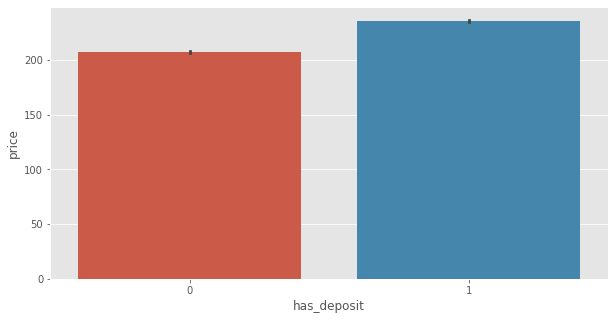

In [64]:
feature = 'has_deposit'
fig, ax = plt.subplots(figsize=(10,5))
print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )

1    205398
0     69473
Name: has_cleaning_fee, dtype: int64


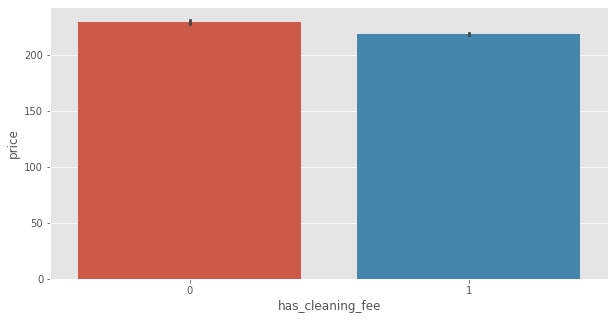

In [65]:
feature = 'has_cleaning_fee'
fig, ax = plt.subplots(figsize=(10,5))
print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )

0    159516
1    115355
Name: extra_people_fee, dtype: int64


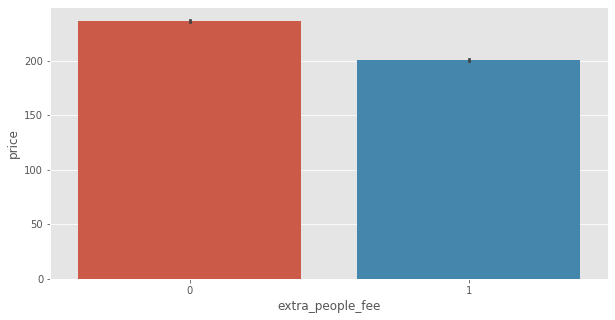

In [66]:
feature = 'extra_people_fee'
fig, ax = plt.subplots(figsize=(10,5))
print(train_df[feature].value_counts())
sns.barplot(data=train_df, x=feature, y='price' )

## Feature Engineering: Count of Amenities
Model Performance: Improved R2 & RMSE. Proceed.

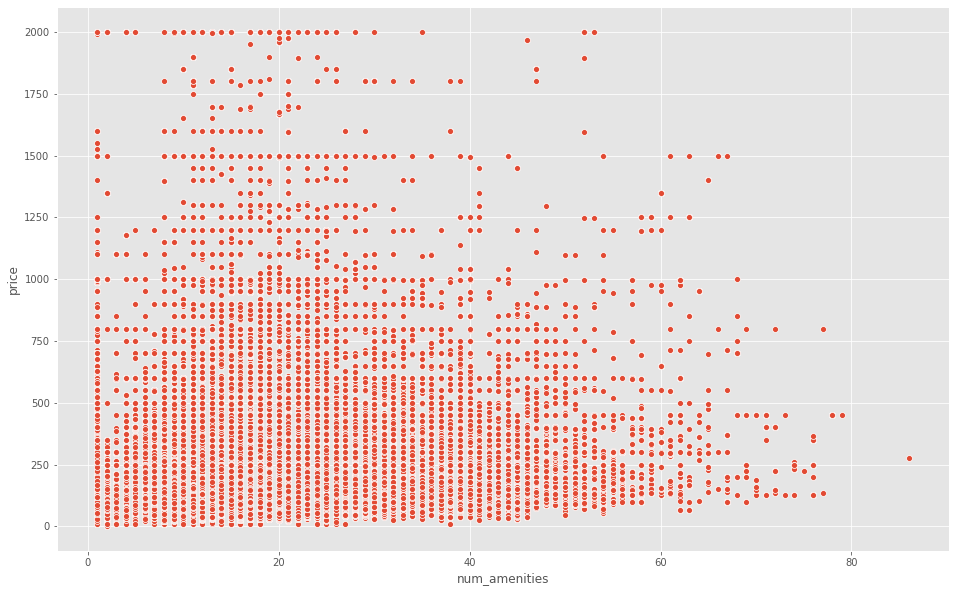

In [67]:
train_df['amenities'] = train_df['amenities'].fillna('0')
train_df['num_amenities'] = train_df['amenities'].transform(lambda x: len(x.split(',')))
train_df['num_amenities'].nunique()

plt.figure(figsize=(16,10))
sns.scatterplot(data=train_df, y='price', x='num_amenities')
#Doesn't seem to be a relationship between number of amenities and price
#May want to look into all amenities and see if certain amenities have higher listing prices?

## Feature Engineering: Threshold for Accomodation Features
Outcome: Did not improve model by much, remove

In [68]:
accom_thresh = 12
bedroom_thresh = 6
bathroom_thresh = 6 #or could be 3?
beds_thresh = 9
train_df['over_accm'] = train_df['accommodates'].transform(lambda x: 1 if x>accom_thresh else 0)
train_df['over_bdrm'] = train_df['bedrooms'].transform(lambda x: 1 if x>bedroom_thresh else 0)
train_df['over_btrm'] = train_df['bathrooms'].transform(lambda x: 1 if x>bathroom_thresh else 0)
train_df['over_beds'] = train_df['beds'].transform(lambda x: 1 if x>beds_thresh else 0)


## Featuring Engineering: Neighborhoods
Unsuccessful with both options

In [69]:
#Option 1: Regions
Northeast = ["Mission", "Western Addition", "South Of Market", "Castro/Upper Market,"
             "Downtown/Civic Center", "Haight Ashbury", "Nob Hill", "Marina", "Pacific Heights",
            "Russian Hill", "North Beach", "Financial District", "Chinatown", "Presidio Heights"]
Southeast = ["Bernal Heights", "Noe Valley", "Potrero Hill", "Excelsior", "Bayview", "Glen Park", 
             "Visitacion Valley," "Crocker Amazon", "Diamond Heights"]
Northwest = ["Inner Richmond", "Outer Sunset", "Outer Richmond", "Inner Sunset", "Twin Peaks", 
             "Seacliff", "Golden Gate Park", "Presidio"]
Southwest = ["Outer Mission", "Parkside", "West of Twin Peaks", "Ocean View", "Lakeshore"]
Other = ["Treasure Island/YBI"]

In [70]:
def region(x):
    if x in Northeast:
        return 'Northeast'
    elif x in Southeast:
        return 'Southeast'
    elif x in Northwest:
        return "Northwest"
    elif x in Southwest:
        return "Southwest"
    else:
        return "Other"
train_df['Region'] = train_df['neighbourhood_cleansed'].apply(region)

In [71]:
#Option 2: Is the listing downtown?
downtown = ["Western Addition", "South Of Market", "Downtown/Civic Center", 
                    "Financial District"]
train_df['Downtown'] = train_df['neighbourhood_cleansed'].transform(lambda x: 1 if x in downtown else 0)

## Feature Engineering: Text Vectorization

In [72]:
'''Extract value from text columns?'''
train_df[['name', 'summary','space', 'description', 'neighborhood_overview',
       'notes', 'transit', 'host_about']].isnull().sum().sort_values(ascending=False).head(50)/len(train_df)

notes                    0.500704
neighborhood_overview    0.376773
transit                  0.353817
host_about               0.279844
space                    0.235110
summary                  0.042482
description              0.000611
name                     0.000087
dtype: float64

In [73]:
#Create text features/vectors based on space, summary, descrtiption, name??
print(train_df['space'].head())
print(train_df['summary'].head())
print(train_df['description'].head())
print(train_df['name'].head())

0    Newly remodeled, modern, and bright garden uni...
1    We live in a large Victorian house on a quiet ...
2    Room rental-sunny view room/sink/Wi Fi (inner ...
3    Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...
4    Please send us a quick message before booking ...
Name: space, dtype: object
0    Our bright garden unit overlooks a grassy back...
1                                                  NaN
2    Nice and good public transportation.  7 minute...
3    Nice and good public transportation.  7 minute...
4    Pls email before booking.  Interior featured i...
Name: summary, dtype: object
0    Our bright garden unit overlooks a grassy back...
1    We live in a large Victorian house on a quiet ...
2    Nice and good public transportation.  7 minute...
3    Nice and good public transportation.  7 minute...
4    Pls email before booking.  Interior featured i...
Name: description, dtype: object
0                  Bright, Modern Garden Unit - 1BR/1B
1                              

In [74]:
train_df[['space','summary','description','name']] = train_df[['space','summary','description','name']].fillna('0')

In [75]:
#Are lengths of these columns impacting?
train_df['len_space'] = train_df['space'].transform(lambda x: 0 if x==0 else len(x))
train_df['len_summary'] = train_df['summary'].transform(lambda x: 0 if x=='0' else len(x))
train_df['len_description'] = train_df['description'].transform(lambda x: 0 if x==0 else len(x))
train_df['len_name'] = train_df['name'].transform(lambda x: 0 if x==0 else len(x))

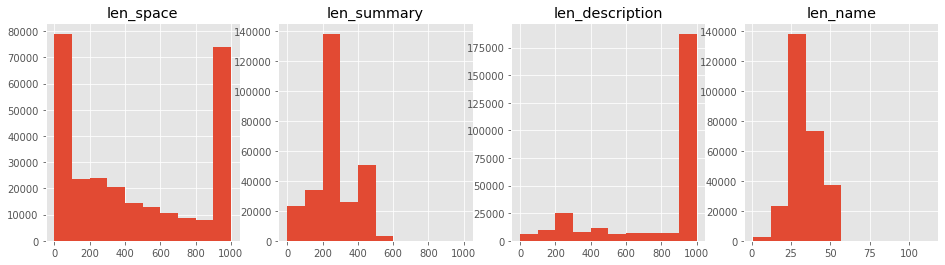

In [76]:
lst = ['len_space','len_summary','len_description','len_name']
fig, axes = plt.subplots(1,4, figsize=(16,4))
for i, ax in enumerate(axes.flatten()):
    ax.hist(train_df[lst[i]])
    ax.set_title(f'{lst[i]}')

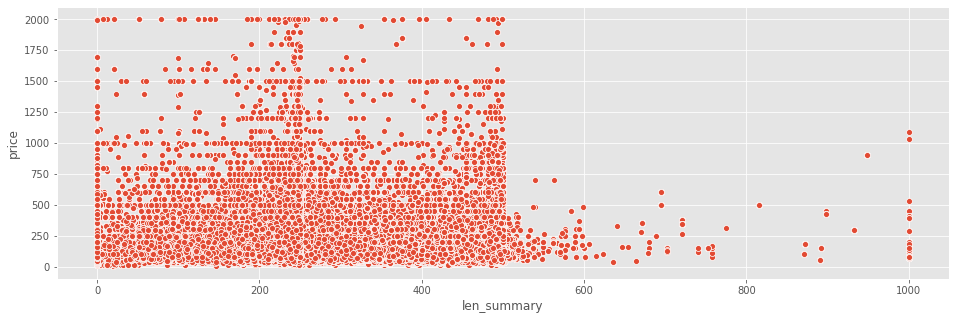

In [77]:
feature = 'len_summary'
fig, ax = plt.subplots(figsize=(16,5))
# print(train_df[feature].value_counts())
sns.scatterplot(data=train_df, x=feature, y='price')

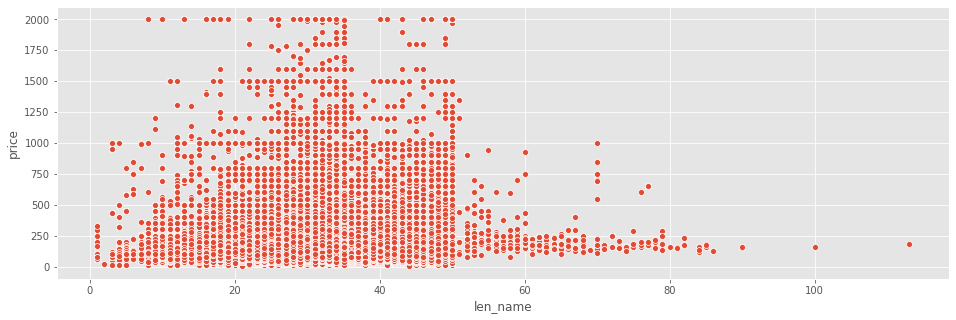

In [78]:
feature = 'len_name'
fig, ax = plt.subplots(figsize=(16,5))
# print(train_df[feature].value_counts())
sns.scatterplot(data=train_df, x=feature, y='price')
plt.savefig('Len_of_Listing_Name.png', bpi = 300)

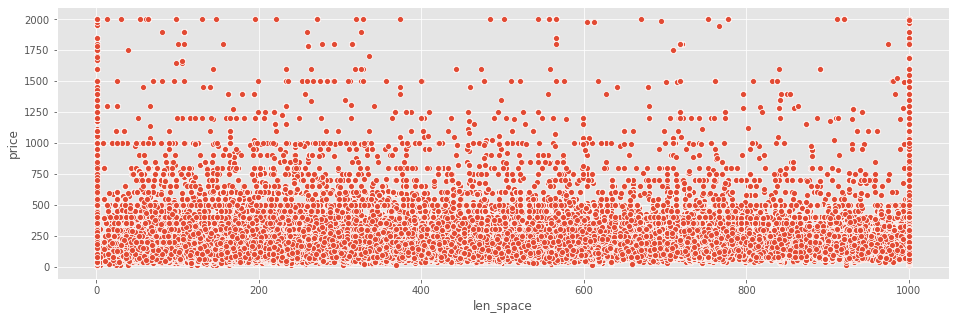

In [79]:
feature = 'len_space'
fig, ax = plt.subplots(figsize=(16,5))
# print(train_df[feature].value_counts())
sns.scatterplot(data=train_df, x=feature, y='price')

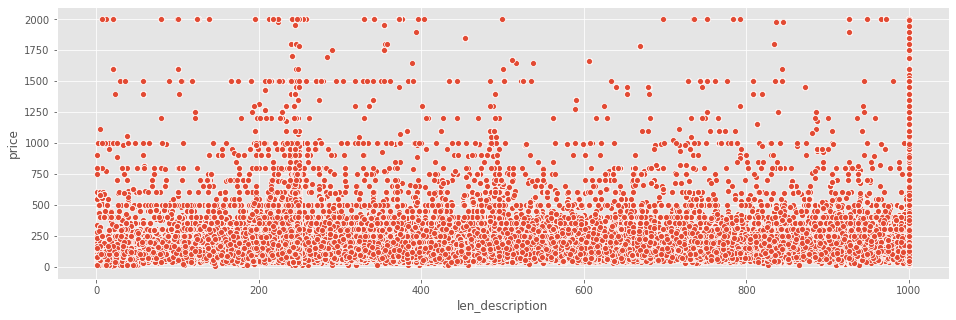

In [80]:
feature = 'len_description'
fig, ax = plt.subplots(figsize=(16,5))
# print(train_df[feature].value_counts())
sns.scatterplot(data=train_df, x=feature, y='price')

## Examing Clusters of text in text columns

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF

vectorizer = TfidfVectorizer(max_features = 100, strip_accents = 'unicode', stop_words='english')

## Checking 'Name'

In [82]:
text_col = 'name'
word_vector_name = vectorizer.fit(train_df[text_col])
word_matrix_name = vectorizer.transform(train_df[text_col]).toarray()
features_name = word_vector_name.get_feature_names()

In [83]:
kmeans= KMeans()
kmeans_name= kmeans.fit(word_matrix_name)

In [84]:
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("\n3) top features (words) for each cluster:")
for num, centroid in enumerate(top_centroids):
    print(f"{num}, {', '.join(features[i] for i in centroid)}")


3) top features (words) for each cluster:


NameError: name 'features' is not defined

In [ ]:
nmf = NMF(n_components=10)
W2_name = nmf.fit_transform(word_matrix_name)
H2_name = nmf.components_

In [ ]:
df_name = pd.DataFrame(word_matrix_name, columns=features_name)
H_df2_name = pd.DataFrame(H2_name)
topics_name = {}
for row in H_df2_name.index:
    top_words = H_df2_name.iloc[row,:].sort_values(ascending=False).head(10).index
    topics_name[row] = df_name.columns[top_words]
topics_name

## Checking summary

In [ ]:
text_col = 'summary'
word_vector_sum = vectorizer.fit(train_df[text_col])
word_matrix_sum = vectorizer.transform(train_df[text_col]).toarray()
features_sum = word_vector_sum.get_feature_names()
kmeans= KMeans()
kmeans_sum= kmeans.fit(word_matrix_sum)
top_centroids = kmeans_sum.cluster_centers_.argsort()[:,-1:-11:-1]
print("\n3) top features (words) for each cluster:")
for num, centroid in enumerate(top_centroids):
    print(f"{num}, {', '.join(features[i] for i in centroid)}")

In [ ]:
nmf = NMF(n_components=10)
W2_sum = nmf.fit_transform(word_matrix_sum)
H2_sum = nmf.components_
df_sum = pd.DataFrame(word_matrix_sum, columns=features_sum)
H_df2_sum = pd.DataFrame(H2_sum)
topics_sum = {}
for row in H_df2_sum.index:
    top_words = H_df2_sum.iloc[row,:].sort_values(ascending=False).head(10).index
    topics_sum[row] = df_sum.columns[top_words]
topics_sum

## Checking Space

In [ ]:
text_col = 'space'
word_vector_space = vectorizer.fit(train_df[text_col])
word_matrix_space = vectorizer.transform(train_df[text_col]).toarray()
features_space = word_vector_space.get_feature_names()
kmeans= KMeans()
kmeans_space= kmeans.fit(word_matrix_space)
top_centroids = kmeans_space.cluster_centers_.argsort()[:,-1:-11:-1]
print("\n3) top features (words) for each cluster:")
for num, centroid in enumerate(top_centroids):
    print(f"{num}, {', '.join(features[i] for i in centroid)}")

In [ ]:
nmf = NMF(n_components=10)
W2_space = nmf.fit_transform(word_matrix_space)
H2_space = nmf.components_
df_space= pd.DataFrame(word_matrix_space, columns=features_space)
H_df2_space = pd.DataFrame(H2_space)
topics_space = {}
for row in H_df2_space.index:
    top_words = H_df2_space.iloc[row,:].sort_values(ascending=False).head(10).index
    topics_space[row] = df_space.columns[top_words]
topics_space

In [ ]:
word_matrix_sum.shape

In [ ]:
len(train_df)

In [ ]:
df_sum

In [ ]:
train_df